Chrome Extensions

Amazon Review Export

Amazon Reviews Exporter | CSV & Images

Helium 10

Python Beutifulsoup Package



In [ ]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string #The string module contains a number of functions to process standard Python strings
import math
import spacy
#spaCy is an open-source software library for advanced
#natural language processing, written in the programming languages Python and Cython.

from sklearn.feature_extraction.text import CountVectorizer
#NLP
"""It is used to transform a given text into a vector on the
basis of the frequency (count) of each word that occurs in the entire text."""

from wordcloud import WordCloud
"""A Wordcloud (or Tag cloud) is a visual representation of text data.
It displays a list of words, the importance of each beeing shown with font size or color.
This format is useful for quickly perceiving the most prominent terms."""


from textwrap import wrap
"""The textwrap module provides TextWrapper class that performs wrapping or filling."""

from textblob import TextBlob
#TextBlob aims to provide access to common text-processing operations through a familiar interface.
"""It provides a simple API for diving into common natural language processing (NLP)
tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis,
classification, translation, and more."""

'It provides a simple API for diving into common natural language processing (NLP) \ntasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, \nclassification, translation, and more.'

In [ ]:
zen = TextBlob("Beautiful is better than ugly. "
 "Explicit is better than implicit. "
"Simple is better than complex.")

In [ ]:
zen.words

WordList(['Beautiful', 'is', 'better', 'than', 'ugly', 'Explicit', 'is', 'better', 'than', 'implicit', 'Simple', 'is', 'better', 'than', 'complex'])

In [ ]:
zen.sentences

[Sentence("Beautiful is better than ugly."),
 Sentence("Explicit is better than implicit."),
 Sentence("Simple is better than complex.")]

In [ ]:
for sentence in zen.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.2166666666666667, subjectivity=0.8333333333333334)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.06666666666666667, subjectivity=0.41904761904761906)


Subjectivity analysis recognizes the contextual polarity of opinions, attitudes, emotions, feelings etc.

Typically, we quantify this sentiment with a positive or negative value, called polarity.

Tokenization ==> going ==> go

driving ==> driv

Lemmetization

octopi ==> Octopus
went ==> go
going ==> go
gone ==> go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving views.csv to views.csv


In [ ]:
!pip install textstat

     |████████████████████████████████| 101 kB 7.5 MB/s 
     |████████████████████████████████| 2.0 MB 53.5 MB/s 


In [ ]:
import textstat
#Textstat is an easy to use library to calculate statistics from text.

In [ ]:
text=pd.read_csv('views.csv')
text.shape

(5000, 6)

In [ ]:
text.head()

,Asin,UserName,Rating,Subject,ReviewDate,Review
0,B07GVR9TG7,Madhuri,5.0 out of 5 stars,TPLINK Archer C1200 Gigabit Router--Worth to p...,Reviewed in India on 18 May 2018,Checked my 100mbps speed getting 100mbps downl...
1,B07GVR9TG7,Subhadeep Kanungo,1.0 out of 5 stars,Version not compatible with cable broadband,Reviewed in India on 1 September 2018,Guys currently Amazon is shipping ver 2 hardwa...
2,B07GVR9TG7,ANUDIP S.,5.0 out of 5 stars,TPLINK ARCHER C7 Ver.4 ROCKS !!! Got 130mbps f...,Reviewed in India on 14 February 2018,Awesome Product...I had a Tplink Archer C20 wh...
3,B07GVR9TG7,Anoop S.,5.0 out of 5 stars,"Good router, value for money.",Reviewed in India on 19 August 2018,"Very happy with this router, easy to setup and..."
4,B07GVR9TG7,Anirudh Devaraj,5.0 out of 5 stars,Complete Package,Reviewed in India on 8 December 2018,I have BSNL Ftth 60Mbps connection in my home....


In [ ]:
text.columns

Index(['Asin', 'UserName', 'Rating', 'Subject', 'ReviewDate', 'Review'], dtype='object')

In [ ]:
textdata = text[['Rating','Review']]
textdata.head()

,Rating,Review
0,5.0 out of 5 stars,Checked my 100mbps speed getting 100mbps downl...
1,1.0 out of 5 stars,Guys currently Amazon is shipping ver 2 hardwa...
2,5.0 out of 5 stars,Awesome Product...I had a Tplink Archer C20 wh...
3,5.0 out of 5 stars,"Very happy with this router, easy to setup and..."
4,5.0 out of 5 stars,I have BSNL Ftth 60Mbps connection in my home....


In [ ]:
#Drop null values
textdata.dropna(inplace=True)
textdata.isna().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Rating    0
Review    0
dtype: int64

In [ ]:
textcopy=textdata.copy()

In [ ]:
textdata['Rating']=textdata['Rating'].apply(lambda x: float(x.split(' out ')[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
textdata.head()

,Rating,Review
0,5.0,Checked my 100mbps speed getting 100mbps downl...
1,1.0,Guys currently Amazon is shipping ver 2 hardwa...
2,5.0,Awesome Product...I had a Tplink Archer C20 wh...
3,5.0,"Very happy with this router, easy to setup and..."
4,5.0,I have BSNL Ftth 60Mbps connection in my home....


In [ ]:
# While developing NLP models capital and lowercase letters are treated
#differently so its required to convert all words to lowercase,
#as few words are in capitals in the review text.
#itertools
textdata['Review']=textdata['Review'].apply(lambda x: x.lower())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#Eliminate punctuaitons

textdata['Review']=textdata['Review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add('router')
stopwords.add('de')
stopwords.add('wifi')
stopwords.add('la')
stopwords.add('le')

In [ ]:
textdata['Review'] = textdata['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
textdata['Review'] = textdata['Review'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
textdata.head()

,Rating,Review
0,5.0,checked 100mbps speed getting 100mbps 100mbps ...
1,1.0,currently shipping 2 hardware compatible cable...
2,5.0,awesome archer c20 stopped working 2 100mbps c...
3,5.0,happy easy setup importantly connect right awa...
4,5.0,60mbps connection home dir816 upon suggestion ...


In [ ]:
textdata['polarity'] = textdata['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
textdata['review_len'] = textdata['Review'].astype(str).apply(len)
textdata['word_count'] = textdata['Review'].apply(lambda x: len(str(x).split()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#Text ==> Numerical
#Logistic Regression
#Math
#Excellent ==> 1 ==> Positve Polarity
#Neutral Polarity is Near Zero
# Worst, Bad Useless  -ve polarity

In [ ]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = textdata.loc[textdata.polarity == 1, ['Review']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

tried dir825 best customer care
best
perfect portable powered
excellent
used order install worked perfectly


In [ ]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = textdata.loc[textdata.polarity == 0, ['Review']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

es sin embargo el malo y lo en 2 2 banda 24 y en se en ni ha pagina medio cable
’ t extend range
bom mas 5g o 300 banda mas 200 5g
bene con 9 e un di che si e di pur dare e lo non mi ha visto mi non male
working beyond 4 5 fading bought model convert printer wireless one yes works


In [ ]:
print('2 reviews with the most negative polarity: \n')
cl = textdata.loc[textdata.polarity <= -0.97500000000000009, ['Review']].sample(2).values
for c in cl:
    print(c[0])

2 reviews with the most negative polarity: 

pathetic garbage buy
worst money


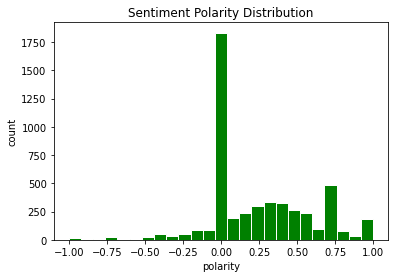

In [ ]:
plt.hist(textdata['polarity'],color='green',edgecolor='white',bins=25)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('polarity')
plt.ylabel('count')
plt.show()

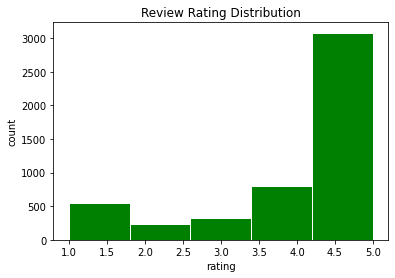

In [ ]:
plt.hist(textdata['Rating'],color='green',edgecolor='white',bins=5)
plt.title('Review Rating Distribution')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

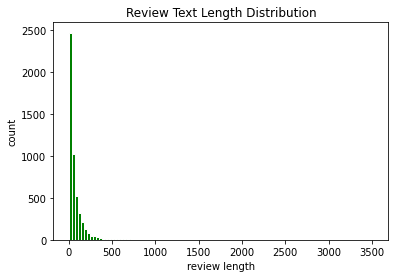

In [ ]:
plt.hist(textdata['review_len'],color='green',edgecolor='white',bins=100)
plt.title('Review Text Length Distribution')
plt.xlabel('review length')
plt.ylabel('count')
plt.show()

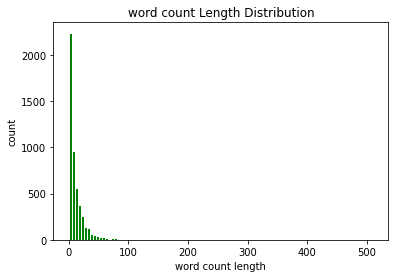

In [ ]:
plt.hist(textdata['word_count'],color='green',edgecolor='white',bins=100)
plt.title('word count Length Distribution')
plt.xlabel('word count length')
plt.ylabel('count')
plt.show()

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(textdata['Review'], 20)
for word, freq in common_words:
    print(word, freq)
textdata1 = pd.DataFrame(common_words, columns = ['Review' , 'count'])



good 1415
product 846
range 840
signal 839
speed 674
un 557
en 547
easy 503
one 469
5ghz 429
connection 360
el 356
great 346
es 340
con 336
use 321
di 304
band 301
da 294
lo 293


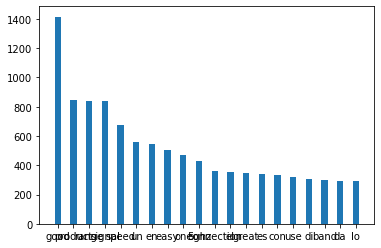

In [ ]:
plt.bar(textdata1['Review'],textdata1['count'],width =0.4)
plt.show()

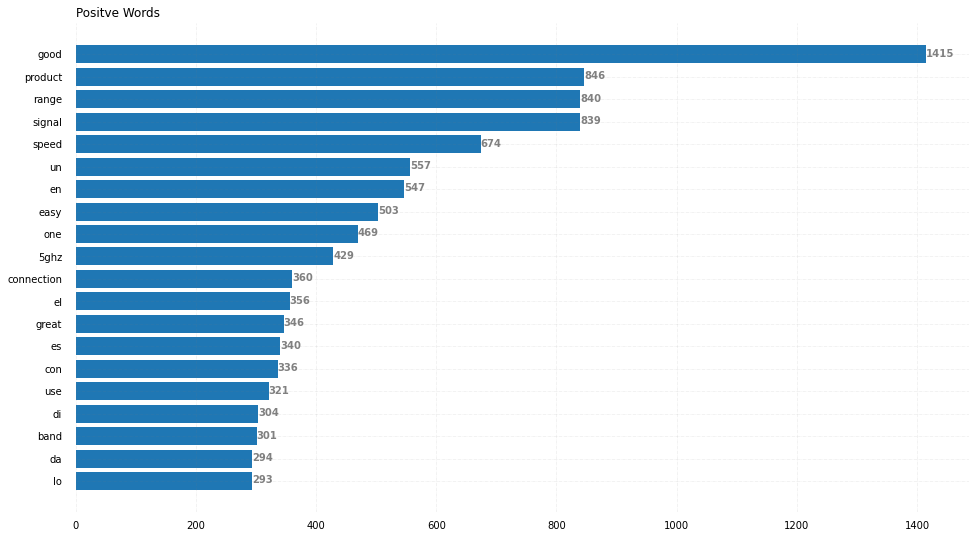

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(textdata1['Review'], textdata1['count'])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Positve Words',
             loc ='left', )


# Show Plot
plt.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(textdata['Review'], 20)
for word, freq in common_words:
    print(word, freq)
textdata3 = pd.DataFrame(common_words, columns = ['Review' , 'count'])

good product 176
easy install 164
signal strength 141
dual band 107
access point 103
archer c6 79
good range 74
range good 73
easy setup 71
value money 70
good signal 68
works well 60
nice product 60
5ghz band 58
easy set 55
good speed 51
good coverage 51
product good 48
en el 48
excellent product 43


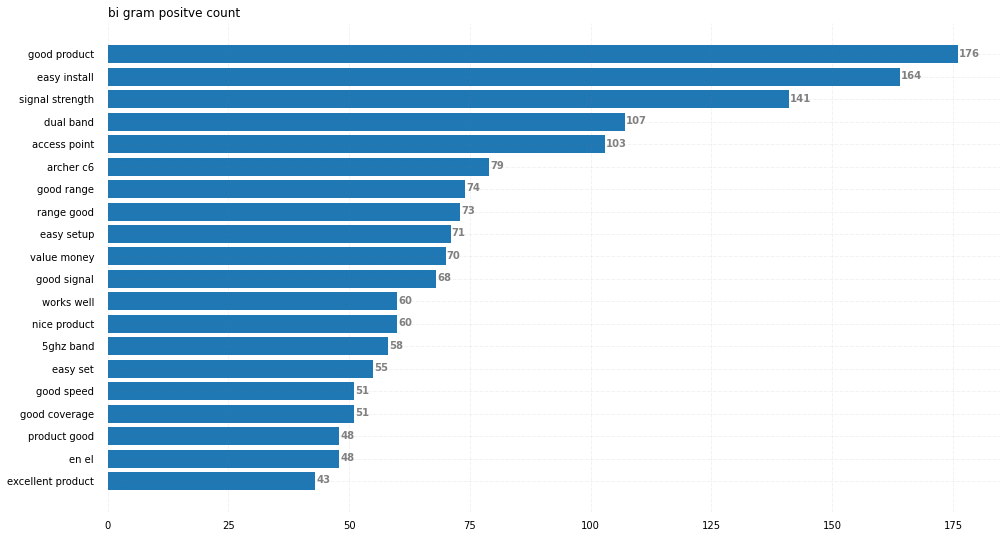

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(textdata3['Review'], textdata3['count'])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('bi gram positve count',
             loc ='left', )


# Show Plot
plt.show()

In [ ]:
textdata.head()

,Rating,Review,polarity,review_len,word_count
0,5.0,checked 100mbps speed getting 100mbps 100mbps ...,0.236111,196,32
1,1.0,currently shipping 2 hardware compatible cable...,0.233333,103,18
2,5.0,awesome archer c20 stopped working 2 100mbps c...,0.299198,492,77
3,5.0,happy easy setup importantly connect right awa...,0.356277,222,32
4,5.0,60mbps connection home dir816 upon suggestion ...,0.480556,219,33


In [ ]:
l=[]
for (i,j) in zip(textdata['polarity'],textdata['Rating']):
  if i>=0.3 and j>=4:
    l.append(1)
  else:
    l.append(0)

In [ ]:
textdata['target']=pd.Series(l)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Drop null values

textdata.dropna(inplace=True)

textdata['target']=textdata['target'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
textdata.head()

,Rating,Review,polarity,review_len,word_count,target
0,5.0,checked 100mbps speed getting 100mbps 100mbps ...,0.236111,196,32,0
1,1.0,currently shipping 2 hardware compatible cable...,0.233333,103,18,0
2,5.0,awesome archer c20 stopped working 2 100mbps c...,0.299198,492,77,0
3,5.0,happy easy setup importantly connect right awa...,0.356277,222,32,1
4,5.0,60mbps connection home dir816 upon suggestion ...,0.480556,219,33,1


In [ ]:
textdata.target.value_counts()

0    3186
1    1812
Name: target, dtype: int64

Wordcloud for all reviews

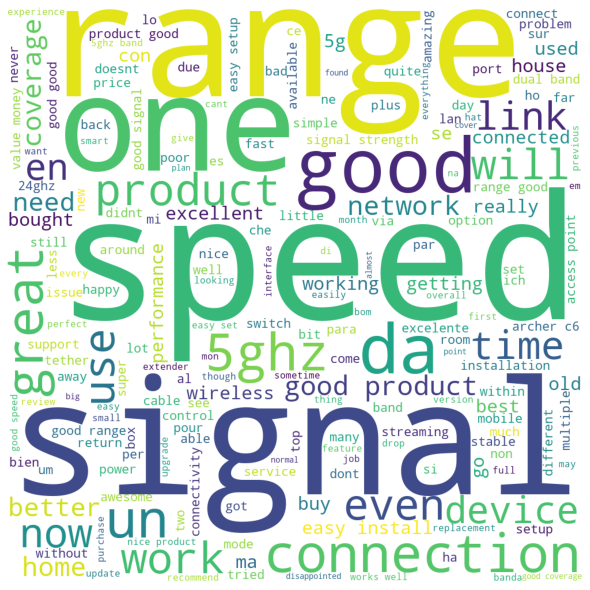

In [ ]:
text = " ".join(review for review in textdata['Review'])
wordcloud = WordCloud(width=1000, height=1000,stopwords=stopwords, background_color='white').generate(text)



# Plot the WordCloud image.You can also give the size of the WordCloud image using the figsize paramter
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

*** Rating distribution ***
5.0    3081
4.0     796
1.0     552
3.0     331
2.0     238
Name: Rating, dtype: int64


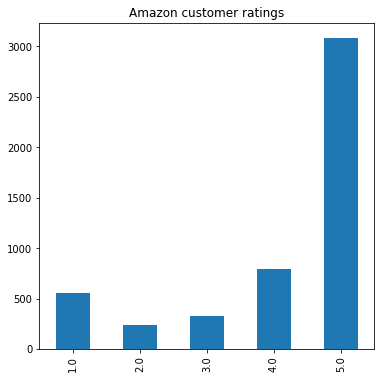

In [ ]:
from matplotlib import pyplot
%matplotlib inline

star = textdata.Rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

In [ ]:
grouped = textdata.groupby(textdata.Rating)

In [ ]:
df = grouped.get_group(1.0)

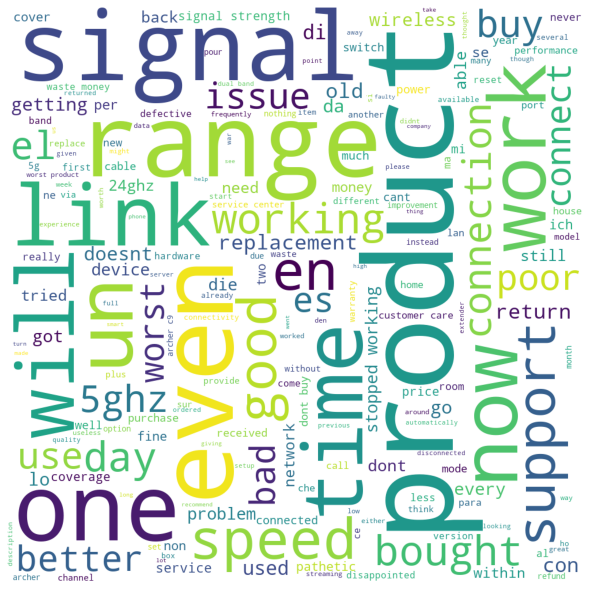

In [ ]:

text = " ".join(review for review in df['Review'])
wordcloud = WordCloud(width=1000, height=1000,stopwords=stopwords, background_color='white').generate(text)



# Plot the WordCloud image.You can also give the size of the WordCloud image using the figsize paramter
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df = grouped.get_group(2.0)

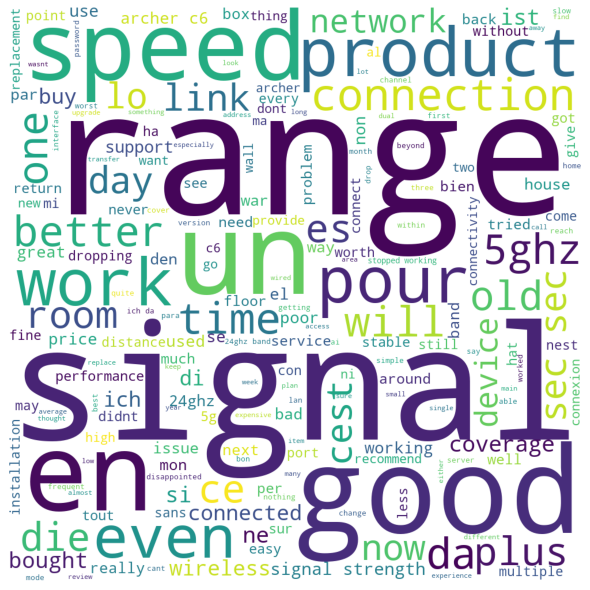

In [ ]:
text = " ".join(review for review in df['Review'])
wordcloud = WordCloud(width=1000, height=1000,stopwords=stopwords, background_color='white').generate(text)



# Plot the WordCloud image.You can also give the size of the WordCloud image using the figsize paramter
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df = grouped.get_group(3.0)

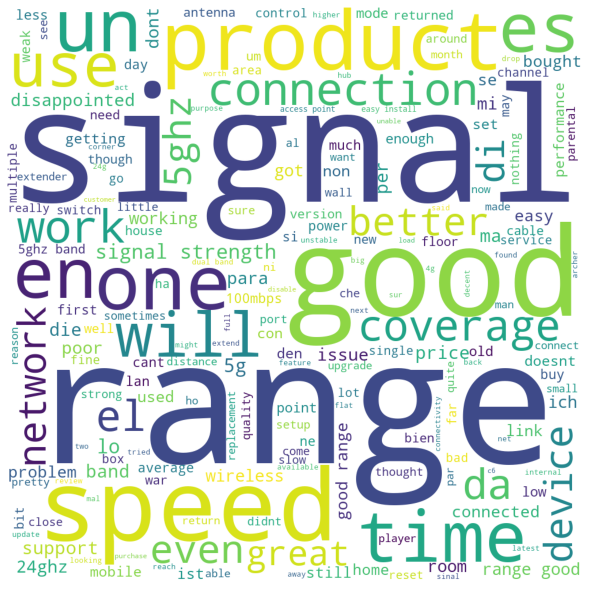

In [ ]:

text = " ".join(review for review in df['Review'])
wordcloud = WordCloud(width=1000, height=1000,stopwords=stopwords, background_color='white').generate(text)



# Plot the WordCloud image.You can also give the size of the WordCloud image using the figsize paramter
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df = grouped.get_group(4.0)

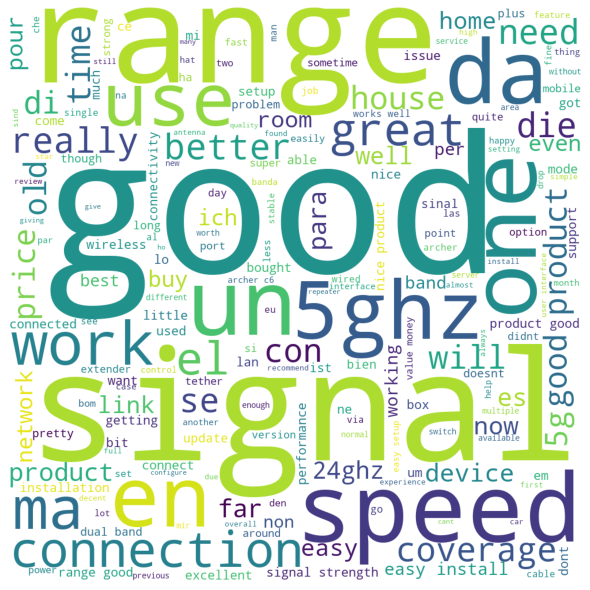

In [ ]:

text = " ".join(review for review in df['Review'])
wordcloud = WordCloud(width=1000, height=1000,stopwords=stopwords, background_color='white').generate(text)



# Plot the WordCloud image.You can also give the size of the WordCloud image using the figsize paramter
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df = grouped.get_group(5.0)

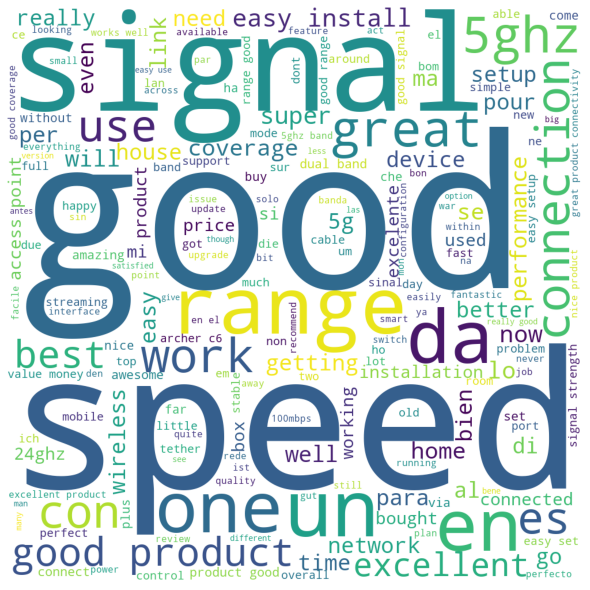

In [ ]:

text = " ".join(review for review in df['Review'])
wordcloud = WordCloud(width=1000, height=1000,stopwords=stopwords, background_color='white').generate(text)



# Plot the WordCloud image.You can also give the size of the WordCloud image using the figsize paramter
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
textdata.head()

,Rating,Review,polarity,review_len,word_count,target
0,5.0,checked 100mbps speed getting 100mbps 100mbps ...,0.236111,196,32,0
1,1.0,currently shipping 2 hardware compatible cable...,0.233333,103,18,0
2,5.0,awesome archer c20 stopped working 2 100mbps c...,0.299198,492,77,0
3,5.0,happy easy setup importantly connect right awa...,0.356277,222,32,1
4,5.0,60mbps connection home dir816 upon suggestion ...,0.480556,219,33,1


In [ ]:
l=[]
for i in textdata['Review']:
  l.append(i)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
#from sklearn.feature_extraction.text import CountVectorizer
#vector=CountVectorizer(max_features=1500)
X=vector.fit_transform(l).toarray()
X=pd.DataFrame(X)

In [ ]:
import pandas as pd
import pickle
pickle.dump(vector, open('tranform.pkl', 'wb'))

NameError: ignored

In [ ]:
X['Rating']=textdata['Rating']
X['target']=textdata['target']

In [ ]:
#Drop null values
X.dropna(inplace=True)
X.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
5207      0
5208      0
5209      0
Rating    0
target    0
Length: 5212, dtype: int64

In [ ]:
Y=X.target.values

In [ ]:
X.drop(["target"], axis=1, inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [ ]:
#LGBM
# importing required libraries
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score

model = lgb.LGBMClassifier()

# fit the model with the training data
model.fit(x_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(x_train)
print('\nTarget on train data',predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on train data [0. 0. 0. ... 1. 0. 0.]

accuracy_score on train dataset :  0.9896860986547085

Target on test data [0. 0. 1. ... 0. 1. 1.]

accuracy_score on test dataset :  0.944560669456067


In [ ]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

NameError: ignored

In [ ]:
!pip3 install catboost

In [ ]:
import pandas as pd
import numpy as np
from catboost import Pool, CatBoostClassifier, cv

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model=CatBoostClassifier(iterations=50, depth=3, learning_rate=0.1)
model.fit(x_train, y_train,eval_set=(x_test, y_test),plot=True)


ModuleNotFoundError: ignored

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
gnb= AdaBoostClassifier()

gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

pre=metrics.precision_score(y_test, y_pred)

f1=metrics.f1_score(y_test, y_pred)

recall=metrics.recall_score(y_test, y_pred)

pre,recall,f1,acc

(0.9155227032734953,
 0.9213602550478215,
 0.9184322033898306,
 0.9194560669456067)

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# load the data
#url = "/home/debomit/Downloads/wine_data.xlsx"
#dataframe = pd.read_excel(url)
#arr = dataframe.values


seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed)

# initialize the base classifier
base_cls = DecisionTreeClassifier()

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)

results = model_selection.cross_val_score(model, X, Y, cv = kfold)
print(results)
print("accuracy :")
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.88888889 0.93079096 0.97410546]
accuracy :
0.931261770244821


In [ ]:
! pip install mlxtend

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf],
                      ['KNN',
                       'Random Forest',
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, Y,
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.90 (+/- 0.04) [KNN]
Accuracy: 0.91 (+/- 0.05) [Random Forest]
Accuracy: 0.71 (+/- 0.06) [Naive Bayes]
Accuracy: 0.92 (+/- 0.03) [StackingClassifier]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

pre=metrics.precision_score(y_test, y_pred)

f1=metrics.f1_score(y_test, y_pred)

recall=metrics.recall_score(y_test, y_pred)

pre,recall,f1,acc

(0.9297297297297298,
 0.9139213602550478,
 0.9217577706323687,
 0.9236401673640168)

In [ ]:
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

pre=metrics.precision_score(y_test, y_pred)

f1=metrics.f1_score(y_test, y_pred)

recall=metrics.recall_score(y_test, y_pred)

pre,recall,f1,acc

(0.9140225179119754,
 0.9489904357066951,
 0.9311783107403545,
 0.9309623430962343)

In [ ]:
gnb=GradientBoostingClassifier()

gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

pre=metrics.precision_score(y_test, y_pred)

f1=metrics.f1_score(y_test, y_pred)

recall=metrics.recall_score(y_test, y_pred)

pre,recall,f1,acc

(0.9324034334763949,
 0.9234856535600425,
 0.9279231179925254,
 0.9293933054393305)

In [ ]:
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

pre=metrics.precision_score(y_test, y_pred)

f1=metrics.f1_score(y_test, y_pred)

recall=metrics.recall_score(y_test, y_pred)

pre,recall,f1,acc

(0.9570747217806042,
 0.6397449521785334,
 0.7668789808917197,
 0.8085774058577406)

In [ ]:
rf=RandomForestClassifier(n_estimators=100,oob_score=True,max_features=5)

rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

pre=metrics.precision_score(y_test, y_pred)

f1=metrics.f1_score(y_test, y_pred)

recall=metrics.recall_score(y_test, y_pred)

pre,recall,f1,acc

(0.9109518935516888,
 0.9458023379383634,
 0.9280500521376434,
 0.9278242677824268)

In [ ]:
svc=SVC()

svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

pre=metrics.precision_score(y_test, y_pred)

f1=metrics.f1_score(y_test, y_pred)

recall=metrics.recall_score(y_test, y_pred)

pre,recall,f1,acc

In [ ]:
lda=LinearDiscriminantAnalysis()

lda.fit(x_train,y_train)

y_pred = lda.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

pre=metrics.precision_score(y_test, y_pred)

f1=metrics.f1_score(y_test, y_pred)

recall=metrics.recall_score(y_test, y_pred)

pre,recall,f1,acc

(0.7867924528301887, 0.8862911795961743, 0.8335832083958022, 0.825836820083682)

In [ ]:
xgb=XGBClassifier()

xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

pre=metrics.precision_score(y_test, y_pred)

f1=metrics.f1_score(y_test, y_pred)

recall=metrics.recall_score(y_test, y_pred)

pre,recall,f1,acc

(0.9336283185840708,
 0.8969181721572795,
 0.9149051490514906,
 0.9178870292887029)

In [ ]:
t=['very good product']
test=vector.transform(t).toarray()
test=pd.DataFrame(test)
Rating=[3.5]
test['Rating']=Rating
predict=lr.predict(test)
predict